**Simple Linear regression**
Simple linear regression is a regression model that estimates the relationship between one independent variable and a dependent variable using a straight line.

**Problem Statement**

The Waist Circumference – Adipose Tissue Relationship:

Studies have shown that individuals with excess Adipose tissue (AT) in their abdominal region have a higher risk of cardio-vascular diseases.
To assess the health conditions of a patient, doctor must get a report on the patients AT values. Computed Tomography, commonly called the CT Scan is the only technique that allows for the precise and reliable measurement of the AT (at any site in the body). 

The problems with using the CT scan are:
- Many physicians do not have access to this technology
- Irradiation of the patient (suppresses the immune system)
- Expensive

The Hospital/Organization wants to find an alternative solution for this problem, which can allow doctors to help their patients efficiently.



**CRISP-ML(Q) process model describes six phases:**

- Business and Data Understanding
- Data Preparation (Data Engineering)
- Model Building (Machine Learning)
- Model Evaluation and Tunning
- Deployment
- Monitoring and Maintenance


**Objective(s):** Minimize the risk for patients
or 
Maximize the convience to doctors in assisting their patients

**Constraints:** CT Scan is the only option

**Research:** A group of researchers conducted a study with the aim of predicting abdominal AT area using simple anthropometric measurements, i.e., measurements on the human body


**Proposed Plan:**
The Waist Circumference – Adipose Tissue data is a part of this study wherein the aim is to study how well waist circumference (WC) predicts the AT area


**Benefits:**
Is there a simpler yet reasonably accurate way to predict the AT area? i.e.,
- Easily available
- Risk free
- Inexpensive


**Data Collection**

Data: 
    AT values from the historical Data
    Waist Circumference of these patients.

Collection:
1. Evaluate the available Hospital records for relevant data (CT scan of patients)

2. Record the Waist Circumference of patients - Primary Data

- Strategy to Collection Primary Data:
    Call out the most recent patients (1 year old) with an offer of free consultation from a senior doctor to attract them to visit hospital.
    Once the paitents visit the hospital, we can record their Waist Circumference with accuracy.

# Load the Data and perform EDA and Data Preprocessing

In [2]:
# Importing necessary libraries
import pandas as pd # deals with data frame        # for Data Manipulation"
import numpy as np  # deals with numerical values  # for Mathematical calculations"

wcat = pd.read_csv(r"C:\Data\wc-at.csv")

wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [3]:
#### Descriptive Statistics and Data Distribution

wcat.describe()

Waist          AT
count  109.000000  109.000000
mean    91.901835  101.894037
std     13.559116   57.294763
min     63.500000   11.440000
25%     80.000000   50.880000
50%     90.800000   96.540000
75%    104.000000  137.000000
max    121.000000  253.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x14da8911ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x14da89265e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14da8911c10>],
 'medians': [<matplotlib.lines.Line2D at 0x14da8926ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14da8931040>],
 'means': []}

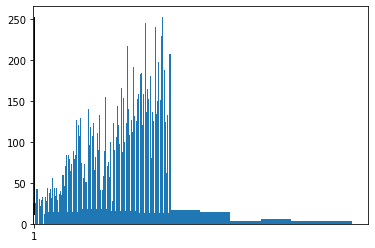

In [4]:
# Graphical Representation
import matplotlib.pyplot as plt         # mostly used for visualization purposes 

plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))
plt.hist(wcat.AT) #histogram
plt.boxplot(wcat.AT) #boxplot


{'whiskers': [<matplotlib.lines.Line2D at 0x14da9b13880>,
 'caps': [<matplotlib.lines.Line2D at 0x14da9b13f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x14da9b135b0>],
 'medians': [<matplotlib.lines.Line2D at 0x14da9b20640>],
 'fliers': [<matplotlib.lines.Line2D at 0x14da9b209a0>],
 'means': []}

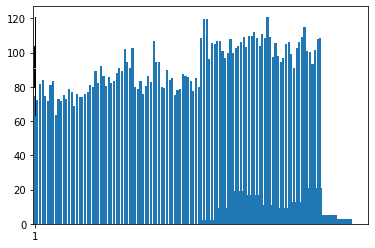

In [5]:
plt.bar(height = wcat.Waist, x = np.arange(1, 110, 1))
plt.hist(wcat.Waist)
plt.boxplot(wcat.Waist)


The above are manual approach to perform Exploratory Data Analysis (EDA). The alternate approach is to Automate the EDA process using Python libraries.

Auto EDA libraries:
- Sweetviz
- dtale
- pandas profiling
- autoviz


# **Automating EDA with Sweetviz:**


Using sweetviz to automate EDA is pretty simple and straight forward. 3 simple steps will provide a detailed report in html page.

step 1. Install sweetviz package using pip.
- !pip install sweetviz

step2. import sweetviz package and call analyze function on the dataframe.

step3. Display the report on a html page created in the working directory with show_html function.


                                             |                                             | [  0%]   00:00 ->…


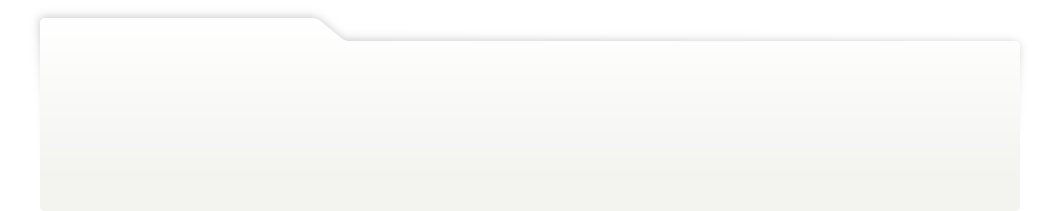
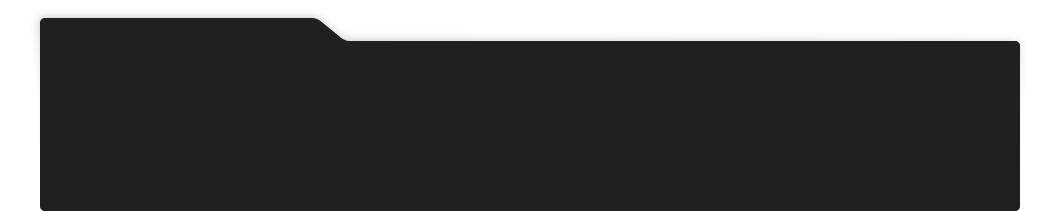
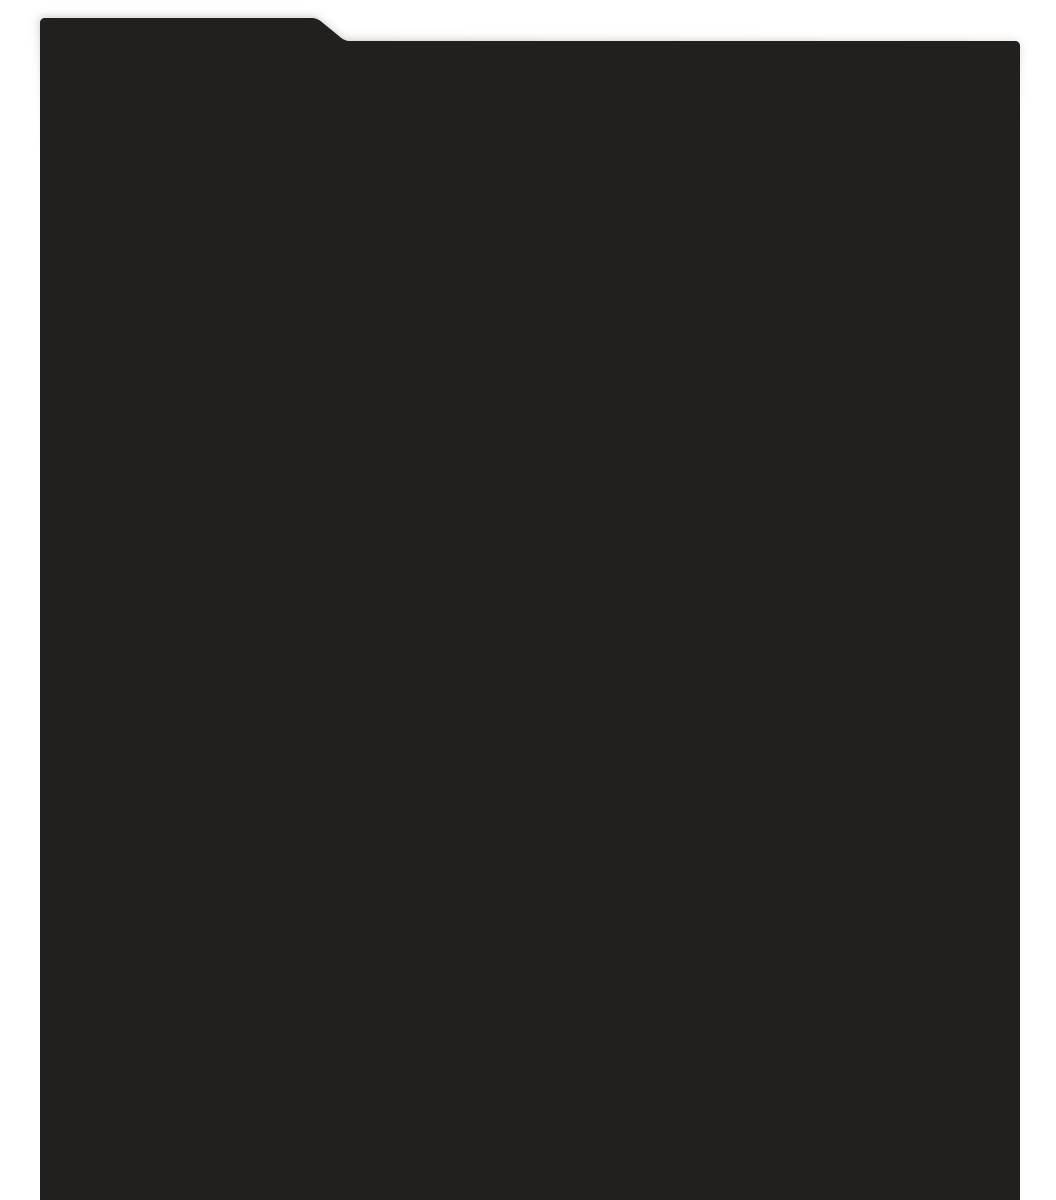
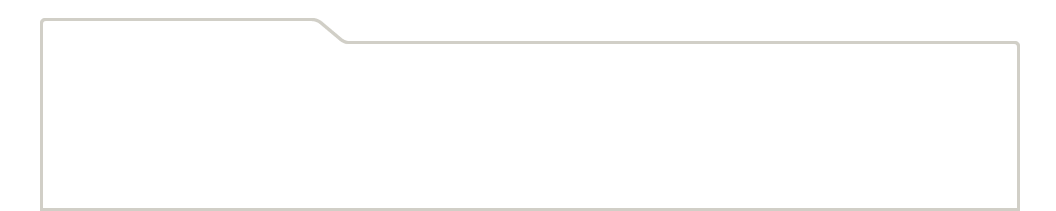
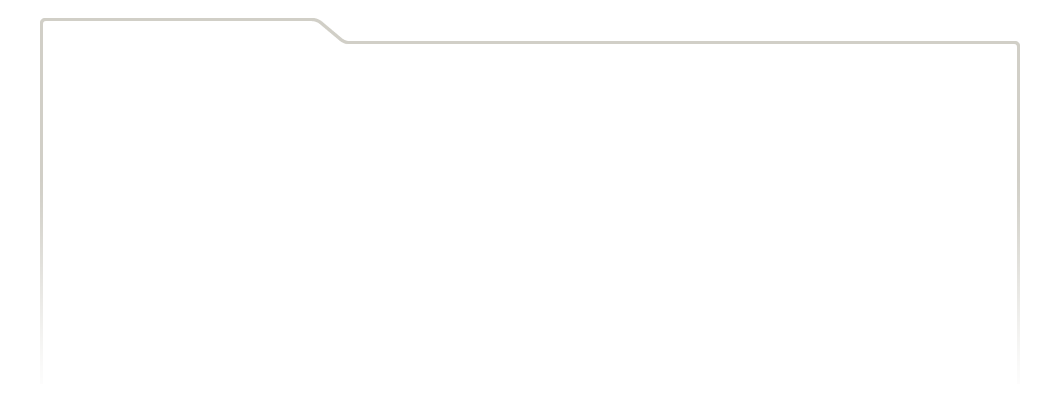
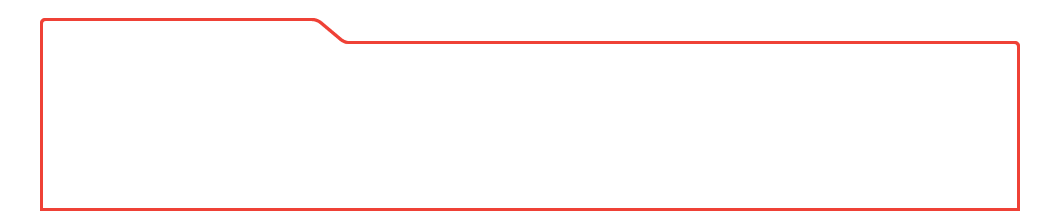
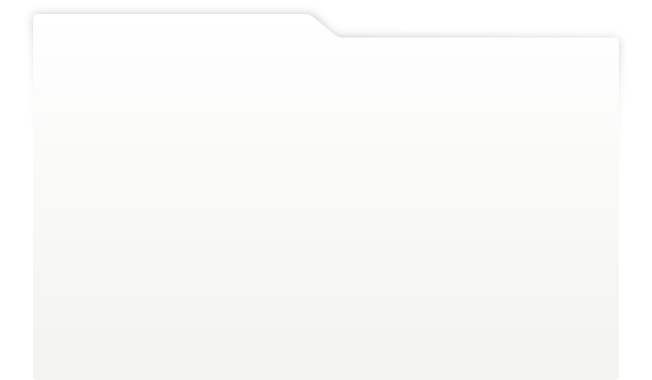
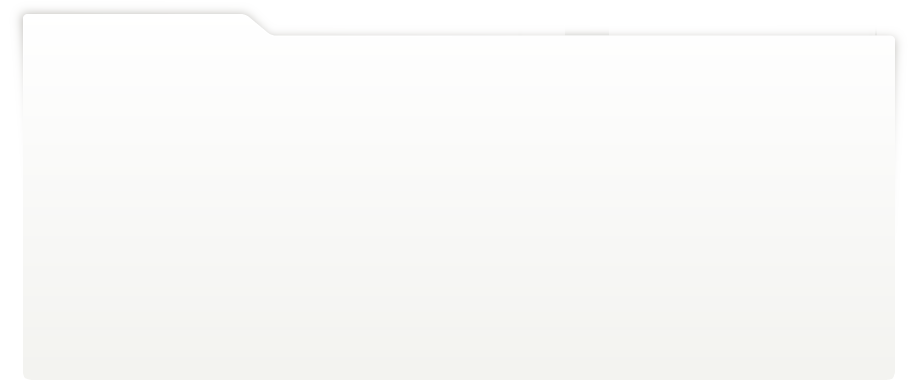
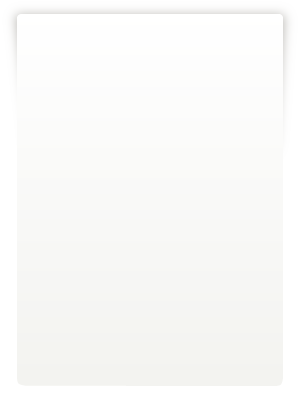
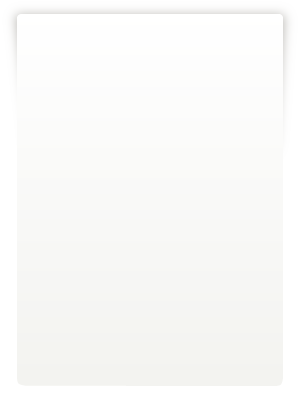
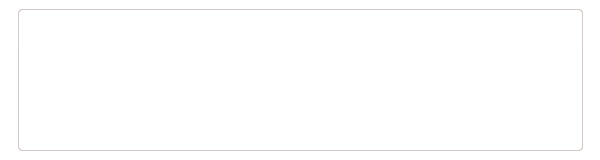
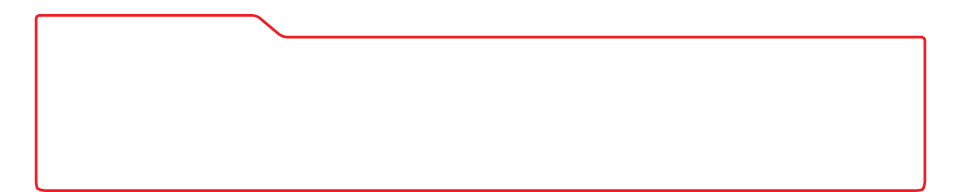
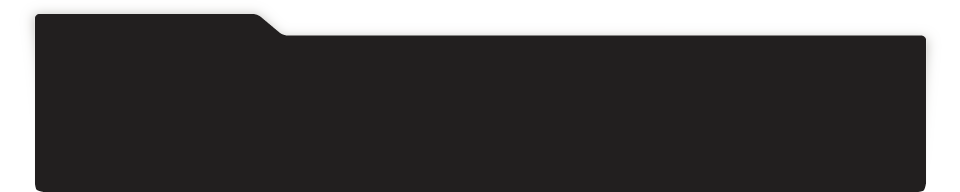
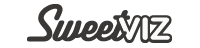
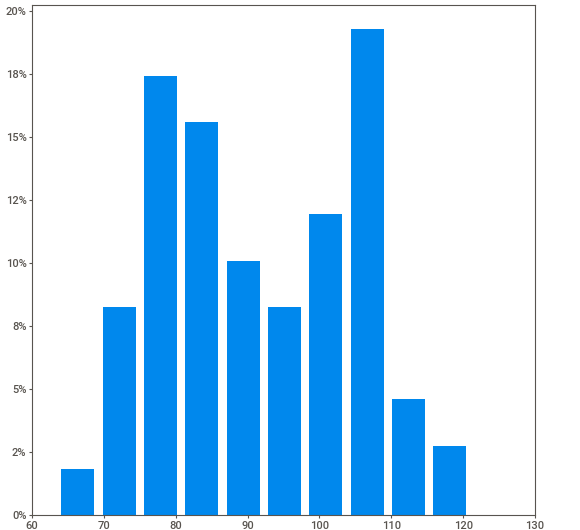
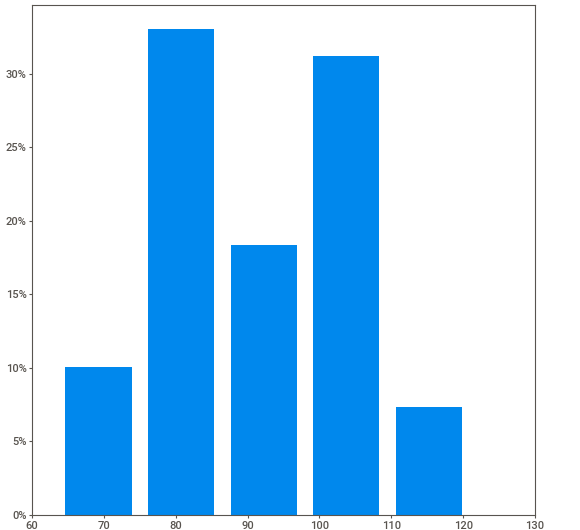
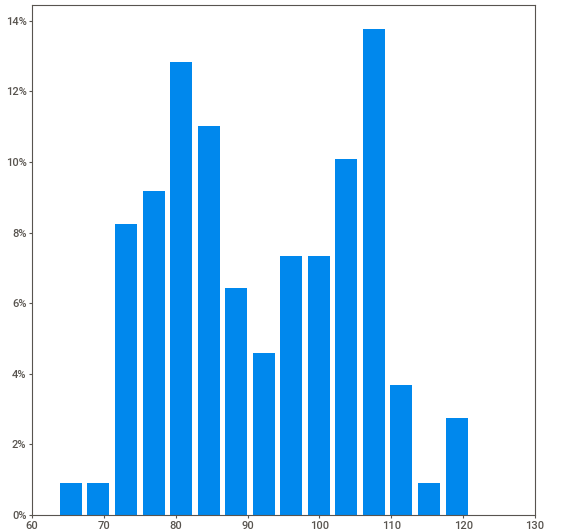
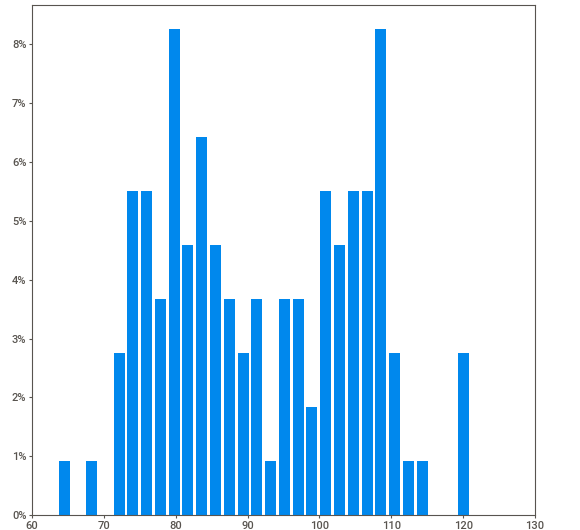
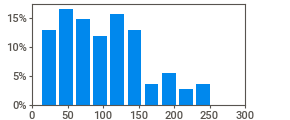
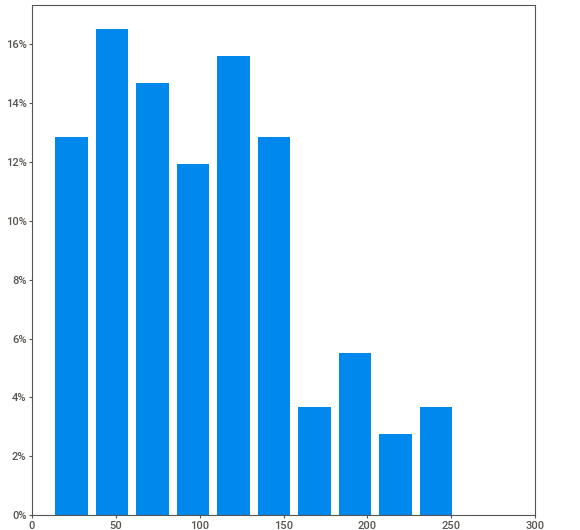
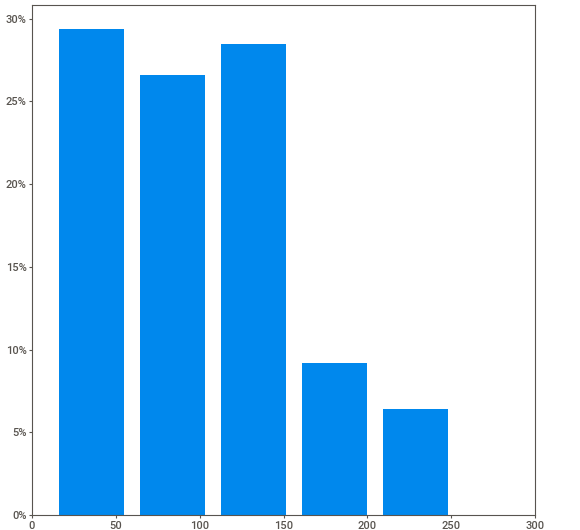
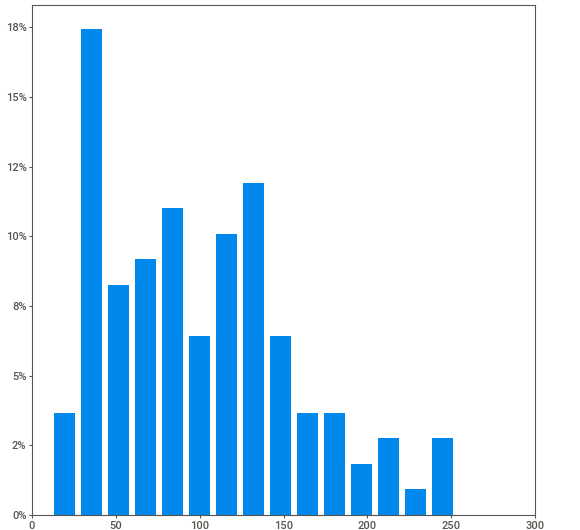
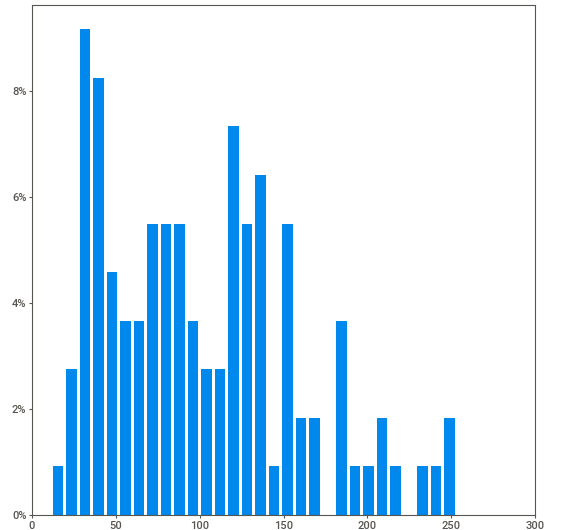
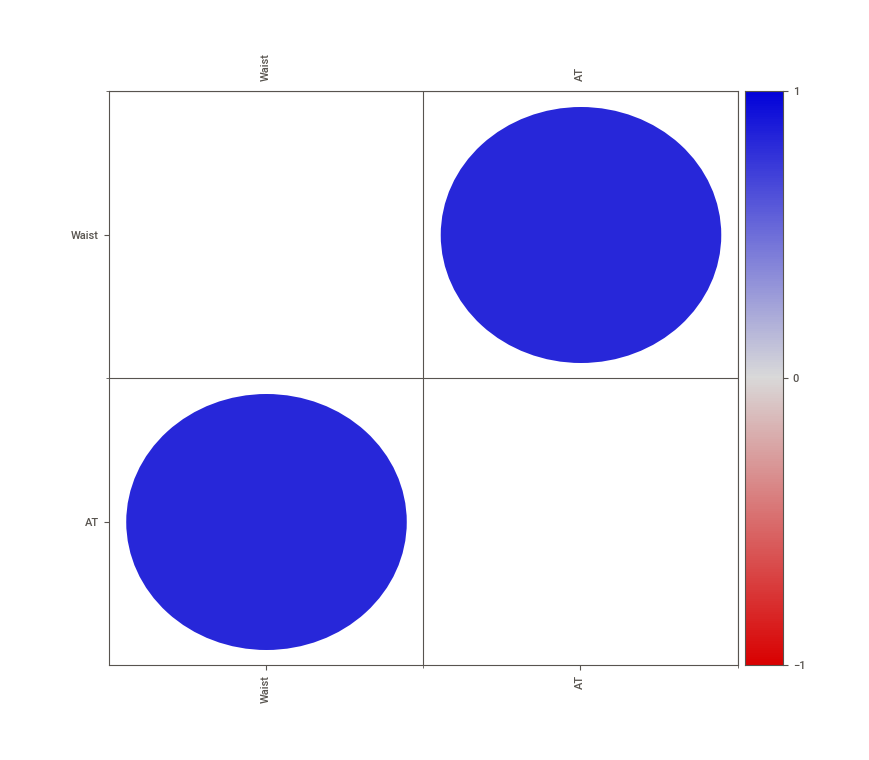
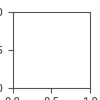

In [6]:
import sweetviz as sv

# Analyzing the dataset
report = sv.analyze(wcat)

# Display the report
report.show_notebook()  # integrated report in notebook

# report.show_html('EDAreport.html') # html report generated in working directory


# Bivariate Analysis

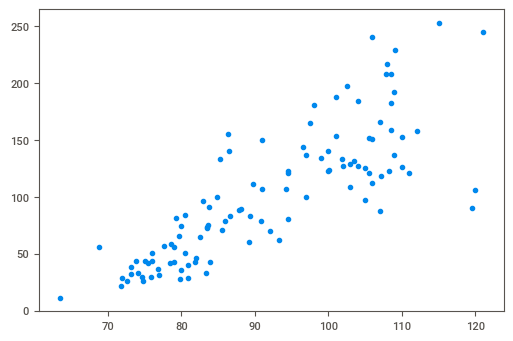

In [7]:
# Scatter plot
plt.scatter(x = wcat['Waist'], y = wcat['AT']) 


In [8]:
## Measure the strength of the relationship between two variables using Correlation coefficient.

np.corrcoef(wcat.Waist, wcat.AT) 


array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [9]:
# Covariance
cov_output = np.cov(wcat.Waist, wcat.AT)[0, 1]
cov_output

# wcat.cov()


635.9100064135238

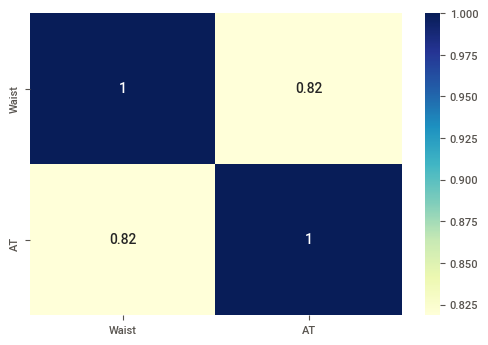

In [12]:
import seaborn as sb

dataplot = sb.heatmap(wcat.corr(), annot=True, cmap="YlGnBu")

# Linear Regression using statsmodels package

In [ ]:
# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('AT ~ Waist', data = wcat).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.62e-27
Time:                        21:44:47   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
pred1 = model.predict(pd.DataFrame(wcat['Waist']))

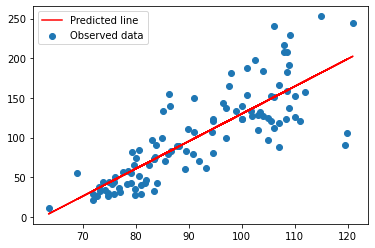

In [15]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [16]:
# Error calculation
res1 = wcat.AT - pred1
np.mean(res1)
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

32.760177495755144

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

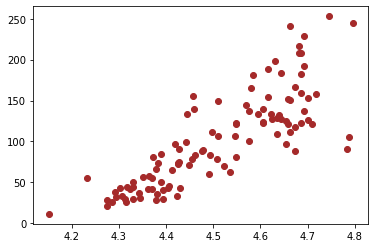

In [18]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation


In [19]:
model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           6.80e-28
Time:                        22:04:18   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

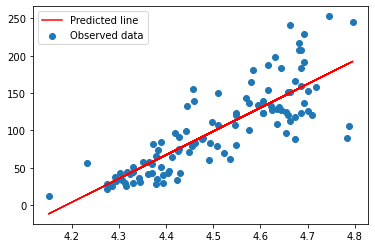

In [20]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

# Regression Line
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [21]:
# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


32.49688490932125

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

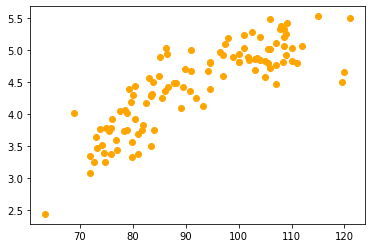

In [22]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')
np.corrcoef(wcat.Waist, np.log(wcat.AT)) #correlation

In [23]:
model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.68e-30
Time:                        22:08:19   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

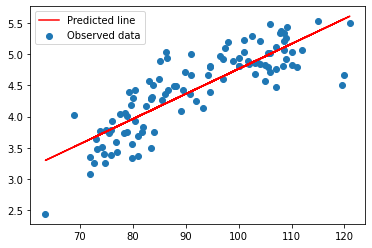

In [25]:
pred3 = model3.predict(pd.DataFrame(wcat['Waist']))

# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [26]:
pred3_at = np.exp(pred3)
pred3_at

# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.52900175807143

In [27]:
#### Polynomial transformation 
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.80e-35
Time:                        22:11:14   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

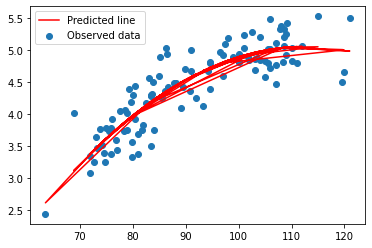

In [28]:
pred4 = model4.predict(pd.DataFrame(wcat))


# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)


plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [29]:
pred4_at = np.exp(pred4)
pred4_at

# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

32.24444782776241

In [30]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse


MODEL       RMSE
0         SLR  32.760177
1   Log model  32.496885
2   Exp model  38.529002
3  Poly model  32.244448

# Evaluate the best model

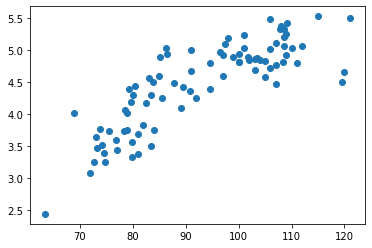

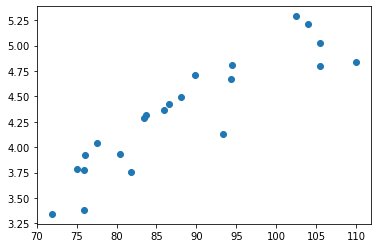

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

plt.scatter(train.Waist, np.log(train.AT))

plt.figure(2)
plt.scatter(test.Waist, np.log(test.AT))

In [32]:
# Fit the best model on train data
finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.39e-27
Time:                        22:15:56   Log-Likelihood:                -25.104
No. Observations:                  87   AIC:                             56.21
Df Residuals:                      84   BIC:                             63.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8834      1.681     -4.691      0.000     -11.225      -4.541
Waist                0.2299      0.037      6.271      0.000       0.157       0.303
I(Waist * Waist)    -0.0010      0.000     -5.193      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.675   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.765
Skew:                           0.195   Prob(JB):                        0.682
Kurtosis:                       2.758   Cond. No.                     4.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

50      92.962752
2       59.975998
19      39.926531
30      66.553292
46     112.315764
60      45.221414
26      79.247187
10      29.100715
31      85.626886
42      55.168400
47     113.155173
41      40.226646
99     142.543909
91     150.288612
105    108.078771
16      40.076410
28      76.731716
81     157.193416
59      67.346936
11      37.290015
67     150.288612
85     146.701501
dtype: float64

In [34]:
# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)

test_rmse

21.02321362964668

In [35]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

34     141.040392
88     147.420030
18      33.956039
17      34.907004
0       36.578320
          ...    
101    156.303480
90     125.292531
83     158.249797
73     134.495233
40      66.553292
Length: 87, dtype: float64

In [36]:
# Model Evaluation on train data
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)

train_rmse


34.47864381896573

# Deploy the Best Model using Flask

In [3]:
from flask import Flask, render_template, request  #, url_for
import pandas as pd
import statsmodels.formula.api as smf

# import pickle
# from sklearn.linear_model import LinearRegression
# from sklearn.externals import joblib


app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])

def predict():
    df= pd.read_csv(r"C:\Data\wc-at.csv")

    regressor = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = df).fit()

    
    if request.method == 'POST':
        value = request.form['val']
        pred = pd.DataFrame([value])
        pred.columns=['Waist']
        my_pred = regressor.predict(pred)
        
    return render_template('result.html', prediction = my_pred)


if __name__ == '__main__':
    app.run(debug = False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
